In [1]:
import pandas as pd 
import scipy
import scipy.stats as stats
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('Display.Max_columns', None)
pd.set_option('Display.Max_rows', None)

In [331]:
df = pd.read_csv('Parsed_SurveyData_Drew.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    994 non-null    int64  
 1   Final_weights         994 non-null    float64
 2   Gender                968 non-null    object 
 3   Race                  994 non-null    object 
 4   Age                   978 non-null    float64
 5   CLIENT_TYPE           994 non-null    object 
 6   BENEFIT               994 non-null    object 
 7   Highest_Degree        994 non-null    object 
 8   Degree_From_Benefits  596 non-null    object 
 9   Raw_Did_You_Appy      596 non-null    object 
 10  Bool_Did_You_Apply    994 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 78.8+ KB


In [332]:
df.head()

,id,Final_weights,Gender,Race,Age,CLIENT_TYPE,BENEFIT,Highest_Degree,Degree_From_Benefits,Raw_Did_You_Appy,Bool_Did_You_Apply
0,43,2653.882353,Female,White,24.0,VET / SM,1606,Bachelor's Degree,Bachelor's Degree,"Yes, and I am currently employed in my field o...",True
1,184,4073.689655,Male,Black or African American,20.0,VET / SM,1606,Some college credit,NaN,NaN,False
2,331,4073.689655,Male,White,34.0,VET / SM,1606,Bachelor's Degree,Bachelor's Degree,"Yes, but I am currently employed in a differen...",True
3,337,4073.689655,Male,White,32.0,VET / SM,1606,Some college credit,NaN,NaN,False
4,369,4073.689655,Male,White,26.0,VET / SM,1606,Associate's Degree,Associate's Degree,"Yes, but I am currently employed in a differen...",True


In [333]:
df['Raw_Did_You_Appy'].value_counts()

Yes, and I am currently employed in my field of study    264
Other (please specify)                                   132
Yes, but I am currently employed in a different field    127
Yes, but I was unable to find employment                  72
Other                                                      1
Name: Raw_Did_You_Appy, dtype: int64

In [19]:
df.rename(columns={'Raw_Did_You_Apply':'Raw', 'Bool_Did_You_Apply':'Applied'},inplace=True)
df.head()

,id,Final_weights,Gender,Race,Age,CLIENT_TYPE,BENEFIT,Highest_Degree,Degree_From_Benefits,Raw_Did_You_Appy,Applied
0,43,2653.882353,Female,White,24.0,VET / SM,1606,Bachelor's Degree,Bachelor's Degree,"Yes, and I am currently employed in my field o...",True
1,184,4073.689655,Male,Black or African American,20.0,VET / SM,1606,Some college credit,NaN,NaN,False
2,331,4073.689655,Male,White,34.0,VET / SM,1606,Bachelor's Degree,Bachelor's Degree,"Yes, but I am currently employed in a differen...",True
3,337,4073.689655,Male,White,32.0,VET / SM,1606,Some college credit,NaN,NaN,False
4,369,4073.689655,Male,White,26.0,VET / SM,1606,Associate's Degree,Associate's Degree,"Yes, but I am currently employed in a differen...",True


In [20]:
df = df[df['Highest_Degree'] != "No High School Credential"]

In [116]:
groups = {"GED":"High School Diploma", "On-the-Job Training":"VET TEC", "Professional Degree":"Doctoral", "Flight Training":"Other", "Bachelor's Degree":"Bachelor's",
          "Master's Degree":"Master's", "Some college credit":"Some college", "Associate's Degree":"Associate's", "Non-College Degree":"Non-College Degree","High School Diploma":"High School Diploma",
           "Doctoral Degree":"Doctoral", "VET TEC Program":"VET TEC", "Other Education":"Other Education"}
df['Highest_Degree'] = df['Highest_Degree'].map(groups)
df['Highest_Degree'].value_counts()

Bachelor's             304
Master's               209
Some college           185
Associate's            146
Non-College Degree      57
High School Diploma     49
Doctoral                30
VET TEC                  8
Other Education          4
Name: Highest_Degree, dtype: int64

In [188]:
df = df[df['Highest_Degree'] != 'VET TEC']
df = df[df['Highest_Degree'] != 'Other Education']
df['Highest_Degree'].value_counts()

Bachelor's             304
Master's               209
Some college           185
Associate's            146
Non-College Degree      57
High School Diploma     49
Doctoral                30
Name: Highest_Degree, dtype: int64

##### Question to Answer : What degrees were most/least likely to apply for a job in their field of study?

In [189]:
df['Num_Applied'] = np.where(df['Applied'] == True, 1,0)
test_df = pd.DataFrame(df.groupby('Highest_Degree').agg({'Num_Applied':'sum','id':'count'}).sort_values(by = 'Num_Applied',ascending=False).reset_index())
test_df['Avg'] = round((test_df['Num_Applied'] / test_df['id']) * 100, 0)
test_df = test_df[['Highest_Degree','Avg']]
test_df.sort_values(by = 'Avg',ascending=False, inplace=True)
test_df

,Highest_Degree,Avg
4,Doctoral,67.0
1,Master's,65.0
3,Non-College Degree,65.0
0,Bachelor's,62.0
2,Associate's,39.0
5,Some college,8.0
6,High School Diploma,8.0


### Order

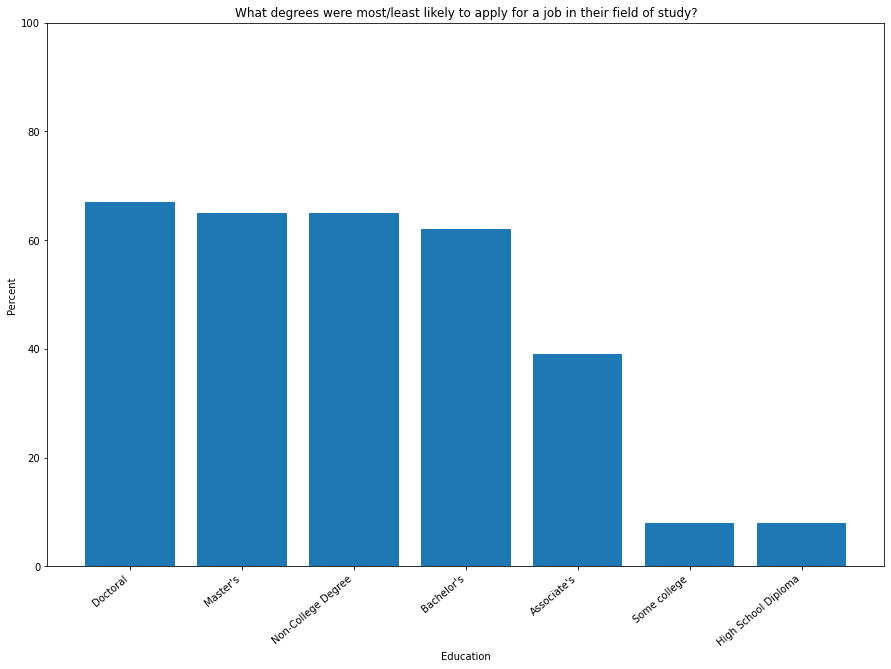

In [190]:
import matplotlib.ticker as mtick
fig = plt.figure(figsize=(15, 10))
plt.bar(test_df['Highest_Degree'], test_df['Avg'])
plt.ylim(0, 100)
plt.title('What degrees were most/least likely to apply for a job in their field of study?')
plt.xlabel('Education')
plt.ylabel('Percent')
plt.xticks(rotation=40,horizontalalignment = 'right')
plt.show()

In [191]:
df_two = df[['Highest_Degree','Num_Applied']]

In [192]:
import statsmodels.api as sm
from statsmodels.formula.api import ols ##ANOVA

model = ols('Num_Applied ~ Highest_Degree',                 # Model formula
            data = df_two).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                    sum_sq     df         F        PR(>F)
Highest_Degree   53.103048    6.0  45.12157  7.772747e-49
Residual        190.852054  973.0       NaN           NaN


##### Results singal there is a significant difference give P-value < 0.05 (P - value is too low)

#### Post Hoc test accounting for the multiple comparisons that may end up inflating the alpha error, the likelihood of calling an insignificant result significant : Tukeys Test

c:\Users\VBACOMelenA\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
Associate's,Bachelor's,0.2313,0.001,0.0995,0.3631,True
Associate's,Doctoral,0.2763,0.0314,0.014,0.5386,True
Associate's,High School Diploma,-0.3088,0.001,-0.5248,-0.0927,True
Associate's,Master's,0.2603,0.001,0.1192,0.4014,True
Associate's,Non-College Degree,0.2587,0.0037,0.0543,0.4631,True
Associate's,Some college,-0.3093,0.001,-0.4542,-0.1645,True
Bachelor's,Doctoral,0.045,0.9,-0.2055,0.2954,False
Bachelor's,High School Diploma,-0.5401,0.001,-0.7415,-0.3386,True
Bachelor's,Master's,0.029,0.9,-0.0886,0.1466,False
Bachelor's,Non-College Degree,0.0274,0.9,-0.1615,0.2163,False


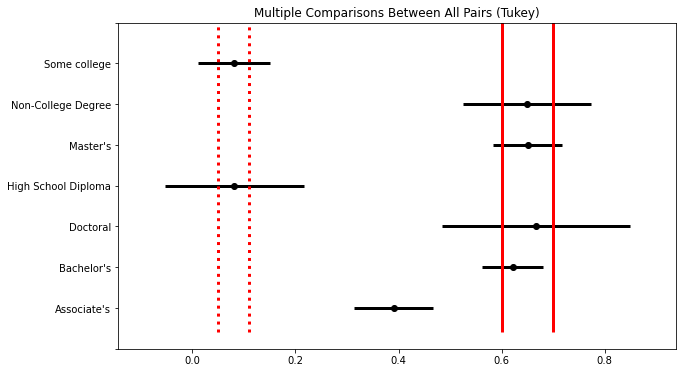

In [330]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_two['Num_Applied'],     # Data
                          groups=df_two['Highest_Degree'],   # Groups
                          alpha=0.05)          # Significance level
  
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=.7,ymin=-0.6,ymax=14, color="red")
plt.vlines(x=.6,ymin=-0.6,ymax=14, color="red")

plt.vlines(x=.05,ymin=-0.6,ymax=14, color="red", linestyle =":")
plt.vlines(x=.11,ymin=-0.6,ymax=14, color="red", linestyle =":")

tukey.summary()              # See test summary

In [194]:
tukey_results = pd.DataFrame(tukey.summary())
tukey_results.columns = tukey_results.iloc[0].astype('str')
tukey_results = tukey_results[1:]
tukey_results 

,group1,group2,meandiff,p-adj,lower,upper,reject
1,Associate's,Bachelor's,0.2313,0.001,0.0995,0.3631,True
2,Associate's,Doctoral,0.2763,0.0314,0.014,0.5386,True
3,Associate's,High School Diploma,-0.3088,0.001,-0.5248,-0.0927,True
4,Associate's,Master's,0.2603,0.001,0.1192,0.4014,True
5,Associate's,Non-College Degree,0.2587,0.0037,0.0543,0.4631,True
6,Associate's,Some college,-0.3093,0.001,-0.4542,-0.1645,True
7,Bachelor's,Doctoral,0.045,0.9,-0.2055,0.2954,False
8,Bachelor's,High School Diploma,-0.5401,0.001,-0.7415,-0.3386,True
9,Bachelor's,Master's,0.029,0.9,-0.0886,0.1466,False
10,Bachelor's,Non-College Degree,0.0274,0.9,-0.1615,0.2163,False


In [195]:
tukey_results['reject'] = tukey_results['reject'].astype('str')
non_different_tukey = tukey_results[tukey_results['reject'] == 'False']
non_different_tukey['group1'] = non_different_tukey['group1'].astype('str')
non_different_tukey['group2'] = non_different_tukey['group2'].astype('str')
merge_df = test_df.copy()
merge_df.rename(columns={'Highest_Degree':'group1'},inplace=True)
non_different_tukey = non_different_tukey.merge(merge_df, on = 'group1', how = 'left')
merge_df.rename(columns={'group1':'group2'},inplace=True)
non_different_tukey = non_different_tukey.merge(merge_df, on = 'group2', how = 'left')
non_different_tukey = non_different_tukey[non_different_tukey['group2'] != "Other Education"]
non_different_tukey

C:\Users\VBACOM~1\AppData\Local\Temp\1/ipykernel_20772/3845347580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_different_tukey['group1'] = non_different_tukey['group1'].astype('str')
C:\Users\VBACOM~1\AppData\Local\Temp\1/ipykernel_20772/3845347580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_different_tukey['group2'] = non_different_tukey['group2'].astype('str')


,group1,group2,meandiff,p-adj,lower,upper,reject,Avg_x,Avg_y
0,Bachelor's,Doctoral,0.045,0.9,-0.2055,0.2954,False,62.0,67.0
1,Bachelor's,Master's,0.029,0.9,-0.0886,0.1466,False,62.0,65.0
2,Bachelor's,Non-College Degree,0.0274,0.9,-0.1615,0.2163,False,62.0,65.0
3,Doctoral,Master's,-0.0159,0.9,-0.2714,0.2395,False,67.0,65.0
4,Doctoral,Non-College Degree,-0.0175,0.9,-0.3127,0.2776,False,67.0,65.0
5,High School Diploma,Some college,-0.0006,0.9,-0.2108,0.2097,False,8.0,8.0
6,Master's,Non-College Degree,-0.0016,0.9,-0.1971,0.1939,False,65.0,65.0


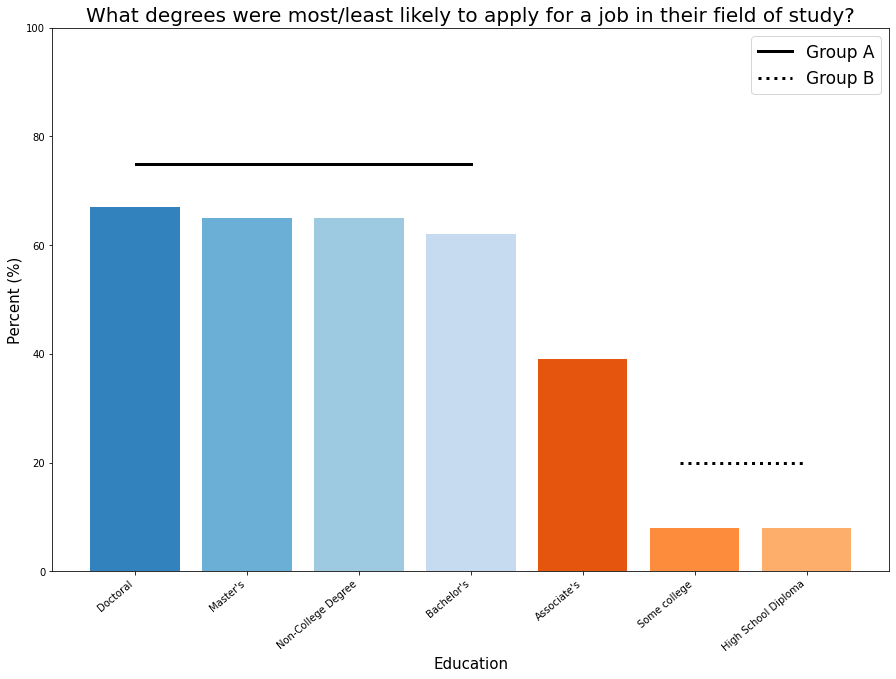

In [320]:
fig = plt.figure(figsize=(15, 10))
col_map = plt.get_cmap("tab20c")
plt.bar(test_df['Highest_Degree'], test_df['Avg'], color=col_map.colors)
plt.ylim(0, 100)
plt.title('What degrees were most/least likely to apply for a job in their field of study?',fontsize = 20)
plt.rcParams['lines.linewidth'] = 3
plt.axhline(75,xmin=.1, xmax=.5, label = 'Group A', color = 'black')
plt.axhline(20,xmin=.75, xmax=.9, label = 'Group B', color = 'black',linestyle =":")
l = plt.legend(loc ='upper right', prop={'size': 17})
l.set_zorder(2.5)
plt.xlabel('Education', fontsize = 15)
plt.xticks(fontsize = 10)
plt.ylabel('Percent (%)',fontsize = 15) 
plt.yticks(fontsize = 10)
plt.xticks(rotation=40,horizontalalignment = 'right')
plt.show()